# -----Regression dataset graduate Admission--------

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv(r'C:\Users\Adeel\Desktop\Deep Learning\Deep_learning\Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.shape

(400, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.drop(columns=['Serial No.'],inplace=True)

In [10]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [12]:
x_train_scaled.shape

(320, 7)

In [13]:
x_test_scaled.shape

(80, 7)

In [14]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

c:\Users\Adeel\Desktop\Deep Learning\Deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
model.fit(x_train_scaled,y_train,epochs=10,validation_split=.2)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 3.5602 - mean_squared_error: 3.5602 - val_loss: 3.7404 - val_mean_squared_error: 3.7404
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.3541 - mean_squared_error: 3.3541 - val_loss: 3.3526 - val_mean_squared_error: 3.3526
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.9123 - mean_squared_error: 2.9123 - val_loss: 3.0166 - val_mean_squared_error: 3.0166
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.6013 - mean_squared_error: 2.6013 - val_loss: 2.7179 - val_mean_squared_error: 2.7179
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.3729 - mean_squared_error: 2.3729 - val_loss: 2.4408 - val_mean_squared_error: 2.4408
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.0565 - mean_squared_error: 2.0565 - val_loss: 2.1781 - val_mean_squared_error: 2.1781
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.9001 - mean_squared_error: 1.9001 - val_loss: 1.8990 - val_mean_squared

In [18]:
y_pred=model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)   

1.0006767689434715

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-42.26794825165874

# ------------improving r2_score-----------------

In [21]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))


c:\Users\Adeel\Desktop\Deep Learning\Deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
history=model.fit(x_train_scaled,y_train,epochs=30,validation_split=.2)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0056 - val_mean_squared

In [28]:
y_predict=model.predict(x_test_scaled)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EAEF09E2A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [29]:
mean_squared_error(y_test,y_predict)

0.004748326960420586

In [30]:
r2_score(y_test,y_predict)

0.7946885831852064

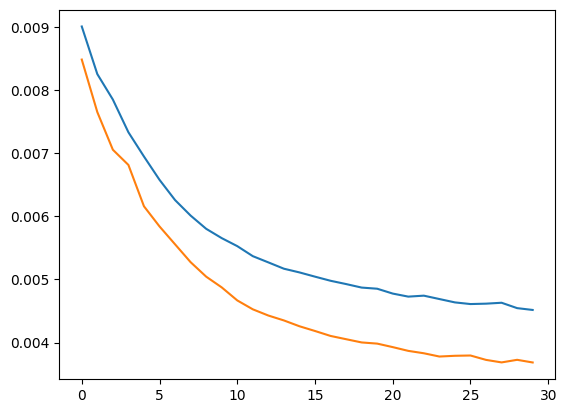

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])